<a href="https://colab.research.google.com/github/mpaydar/CS381/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Overview of dataset
The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 
21 and above.

#Description of attrubutes
 
1. Pregnancies:
       Number of times pregnant (preg)
2. Glucose:
       Plasma glucose concentration a 2 hours in an oral  
       glucose tolerance test (plas)
3. BloodPressure:
       Diastolic blood pressure in mm Hg
4. SkinThickness: 
       Triceps skin fold thickness in mm (skin)
5. Insulin:
       2-Hour serum insulin in mu U/ml (insu)

6. BMI 
        Body mass index measured as weight in kg/(height in m)^2 (mass)
7. DiabetesPedigreeFunction:
        Diabetes pedigree function (pedi)

        Indicates the function which scores likelihood of 
        diabetes based on family history. 

8. Age:
        Age in years (age)
9. Outcome:
        The risk of being diabetic. 
        according to measurement of genetic influence 
        gave us an idea of the  hereditary risk one might 
        have with the onset of diabetes mellitus.

        (0 if non-diabetic, 1 if diabetic)



**Background Knowledge:**
#Glucose:
n= Glucose level; unit: mg/dL


n<140 mg/dL (7.8 mmol/L) = Normal

-----------------------------------------

140<n <199 = prediabetes

--------------------------------------
200 mg/dl < n = diabetes



#Blood Pressure: 

We have systolic pressure and diastolic pressure 

 ------------------------------------------
Normal blood pressure:  

systolic pressure < 120

diastolic pressure < 80

------------------------------------------

Elevated blood pressure:
     
120 < systolic pressure < 129    with

diastolic pressure < 80

-------------------------------------------
High blood pressure:

systolic pressure < 130
 
  or 

80 < diastolic pressure 

-------------------------------------------------

isolated systolic hypertension:

 130 < systolic pressure with  diastolic pressure < 80

This is due to age-related stiffening of the major arteries. It is the most common form of high blood pressure in older adults and can lead to serious health problems in addition to shortness of breath during light physical activity, lightheadedness upon standing too fast. 


# Skin Thickness

skin thickness is increased and significantly related to duration of diabetes

# Insulin

Normal:

blood sugar<100 mg/Dl

---------------------------------------------------

prediabetes:

100 mg/Dl< blood sugar < 125 mg/DL

---------------------------------------------------

diabetes:

126 mg/Dl< blood sugar 



#BMI

Below 18.5                  	Underweight

----------------------------------------------------

18.5—24.9	                      Healthy

-----------------------------------------------------


25.0—29.9	                      Overweight

-----------------------------------------------------


30.0 and Above                  	Obese






In [238]:
import pandas as pd 
import numpy as np


dataframe=pd.read_csv("https://raw.githubusercontent.com/mpaydar/CS381/main/project1/diabetes.csv")
print(dataframe.head())


print("-------------------------------------")
print("\n")
records,attributes=dataframe.shape
print (f'There are {attributes} attributes and {records} records')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
-------------------------------------


There are 9 attributes and 768 records


In [239]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Each attributes has one data type , so this is good as we don't to be worried on cleaning the data from multiple data types in a column. 

In [240]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking at the statistic facts, we see the minimum, for Pregnancies,Glucose	BloodPressure,SkinThickness	,Insulin,	BMI, is 0 . It does not make sense to have 0 for these attributes since all these values have real value of greater than 0. 


Also notice the average age of women participating in this survery is 33. Age has strong correlation with the outcome of the analysis. Looking at at the correlation table Age and Outcome have 24 % correlation. 


The other fact which is interesting is the high standard deviation for Insulin:115. It might be due to the fact that we are missing a lot of enteries for Insulin column.  

# Looking at the correlation table

In [241]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


As it could be seen all the attributes have some impact on the whether a person is diabetic or not . Note the following correlation:

Outcome and Glucose: 0.46

Outcome and BMI: 0.29

Outcome and Pregnancies: 0.22

Outcome and age: 0.23



# Checking For NULL

In [242]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Null Values checked, everything looks good and no missing values are there 

# Checking Outlier

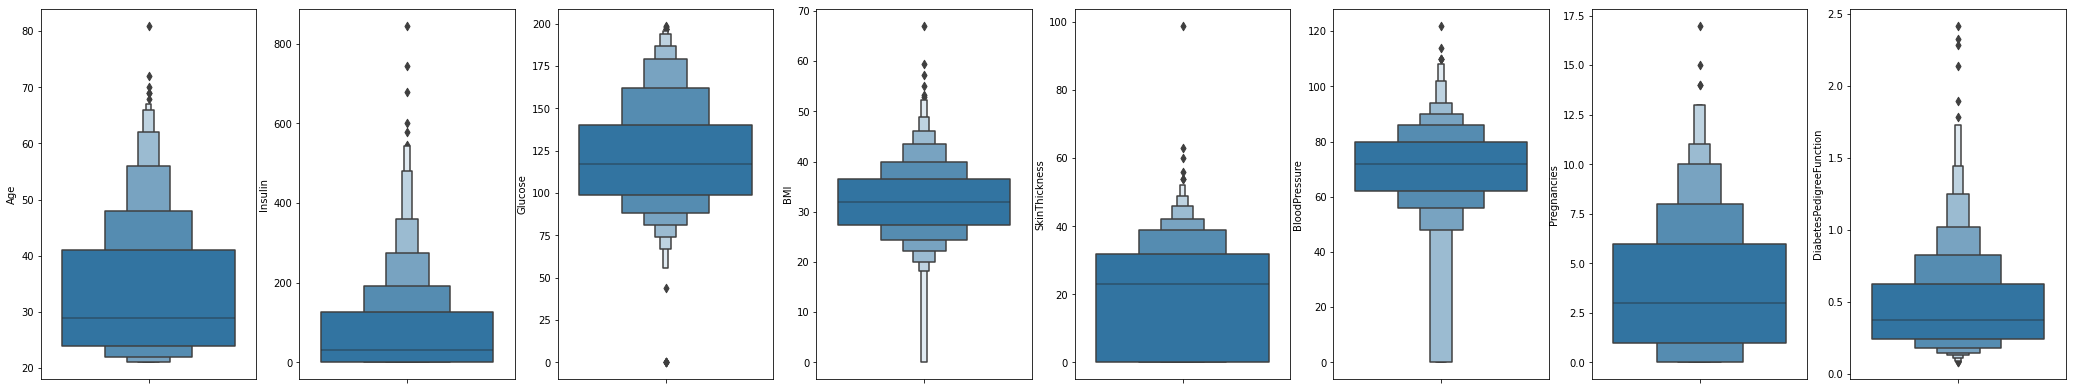

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt






# values=dataframe[['Age' , 'Insulin' , 'Glucose' , 'BMI' ,'SkinThickness','BloodPressure','Pregnancies','DiabetesPedigreeFunction' ]]
# sns.catplot(data=values,kind='box',height=4,aspect=10)


plt.subplot(2,8,1)
sns.boxenplot(y=dataframe['Age'],x=None,data=dataframe)


plt.subplot(2,8,2)
sns.boxenplot(y=dataframe['Insulin'],x=None,data=dataframe)

plt.subplot(2,8,3)
sns.boxenplot(y=dataframe['Glucose'],x=None,data=dataframe)

plt.subplot(2,8,4)
sns.boxenplot(y=dataframe['BMI'],x=None,data=dataframe)

plt.subplot(2,8,5)
sns.boxenplot(y=dataframe['SkinThickness'],x=None,data=dataframe)

plt.subplot(2,8,6)
sns.boxenplot(y=dataframe['BloodPressure'],x=None,data=dataframe)

plt.subplot(2,8,7)
sns.boxenplot(y=dataframe['Pregnancies'],x=None,data=dataframe)


plt.subplot(2,8,8)
sns.boxenplot(y=dataframe['DiabetesPedigreeFunction'],x=None,data=dataframe)

plt.gcf().set_size_inches(15, 15)
plt.subplots_adjust(right=2)

plt.show()


## 0-Min Issue
Looking at the boxplots , we see the problem of minimum 0 for attributes as stated earlier. Most problem is with Insulin and SkinThickness. Since, we are missing a lot of data for inulsin and the level of insulin somehow provide similiar information as glucose, best decision is to drop this column. 


In [244]:
# Checking To see what percentage of Insulin enteries are 0


a1,b1=dataframe.shape
a2=dataframe['Insulin'].where(dataframe['Insulin']==0).value_counts()
answer1=(a2/a1) * 100
answer1



a3=dataframe['Glucose'].where(dataframe['Glucose']==0).value_counts()
answer2=(a3/a1) * 100
answer2


a4=dataframe['BMI'].where(dataframe['BMI']==0).value_counts()
answer3=(a4/a1) * 100
answer3


a5=dataframe['SkinThickness'].where(dataframe['SkinThickness']==0).value_counts()
answer4=(a5/a1) * 100
answer4


a6=dataframe['BloodPressure'].where(dataframe['BloodPressure']==0).value_counts()
answer5=(a6/a1) * 100
answer5




pd.DataFrame([answer1,answer2,answer3,answer4,answer5])












,0.0
Insulin,48.697917
Glucose,0.651042
BMI,1.432292
SkinThickness,29.557292
BloodPressure,4.557292


The above table shows the percentage of data missing(0's) in attributes that can't have 0 minimum in reality and it could be seen that Insulin and SkinThickness have the highest missing data perctentage

# Histogram


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f955d432190>,
      dtype=object)

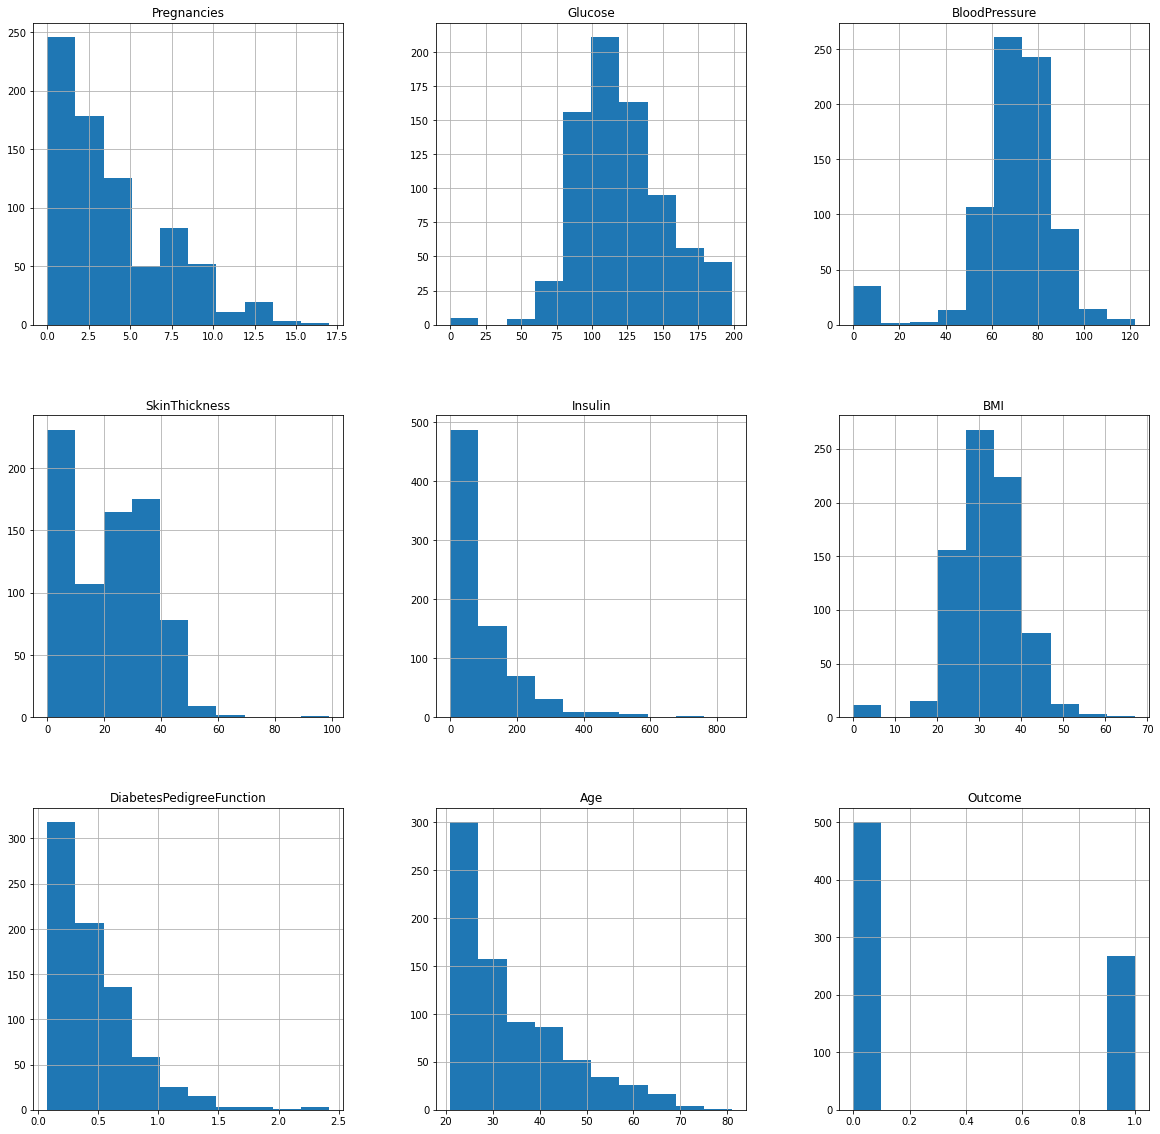

In [245]:
dataframe.hist(figsize=(20,20))

There is no new insight that could be gained from the histogram

# Break Out of Women Depending On Their BMI

In [246]:
bmi_list=pd.Series([]) 
df_copy=dataframe
for i in range(len(df_copy)):  
    if df_copy['BMI'][i] < 18.5: 
        bmi_list[i]="Underweight"
        
    elif df_copy['BMI'][i] < 25: 
        bmi_list[i]="Normal"
  
    elif df_copy['BMI'][i] >= 25 and df_copy['BMI'][i] < 30: 
        bmi_list[i]="Overweight"
  
    elif df_copy['BMI'][i] >= 30: 
        bmi_list[i]="Obese"
        
    else: 
        bmi_list[i]= df_copy['BMI'][i] 
df_copy.insert(6,"BMI TYPE",bmi_list)
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,BMI TYPE,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


#Break Out of Women Depending On Glucose Level

In [247]:
glucose_list=pd.Series([]) 
# n<140 mg/dL (7.8 mmol/L) = Normal

# -----------------------------------------

# 140<n <199 = prediabetes

# --------------------------------------
# 200 mg/dl < n = diabetes
df_copy=dataframe
for i in range(len(df_copy)):   
    if df_copy['Glucose'][i] <= 140: 
        glucose_list[i]="Normal"
        
    elif 140 <df_copy['Glucose'][i] and df_copy['Glucose'][i] <= 198 : 
        glucose_list[i]="Prediabetes"
  
    elif df_copy['Glucose'][i] > 198: 
        glucose_list[i]="Diabetes"
df_copy.insert(3,"Glucose level",glucose_list)
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,Glucose level,SkinThickness,Insulin,BMI,BMI TYPE,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,Prediabetes,35,0,33.6,Obese,0.627,50,1
1,1,85,66,Normal,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,Prediabetes,0,0,23.3,Normal,0.672,32,1
3,1,89,66,Normal,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,Normal,35,168,43.1,Obese,2.288,33,1


# Break Out Of Women Depending On Age(Young vs. Old)
Young women  age range=21-35

Old women age range= 35<age 

In [248]:
age_list=pd.Series([]) 
# n<140 mg/dL (7.8 mmol/L) = Normal

# -----------------------------------------

# 140<n <199 = prediabetes

# --------------------------------------
# 200 mg/dl < n = diabetes
df_copy=dataframe
for i in range(len(df_copy)): 
    if df_copy['Age'][i] <= 35: 
        age_list[i]="Young"
    
    elif df_copy['Age'][i] > 35: 
        age_list[i]="Old"
df_copy.insert(10,"Age Range",age_list)
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,Glucose level,SkinThickness,Insulin,BMI,BMI TYPE,DiabetesPedigreeFunction,Age,Age Range,Outcome
0,6,148,72,Prediabetes,35,0,33.6,Obese,0.627,50,Old,1
1,1,85,66,Normal,29,0,26.6,Overweight,0.351,31,Young,0
2,8,183,64,Prediabetes,0,0,23.3,Normal,0.672,32,Young,1
3,1,89,66,Normal,23,94,28.1,Overweight,0.167,21,Young,0
4,0,137,40,Normal,35,168,43.1,Obese,2.288,33,Young,1


# Visualization among women by age,glucose level, and bmi type

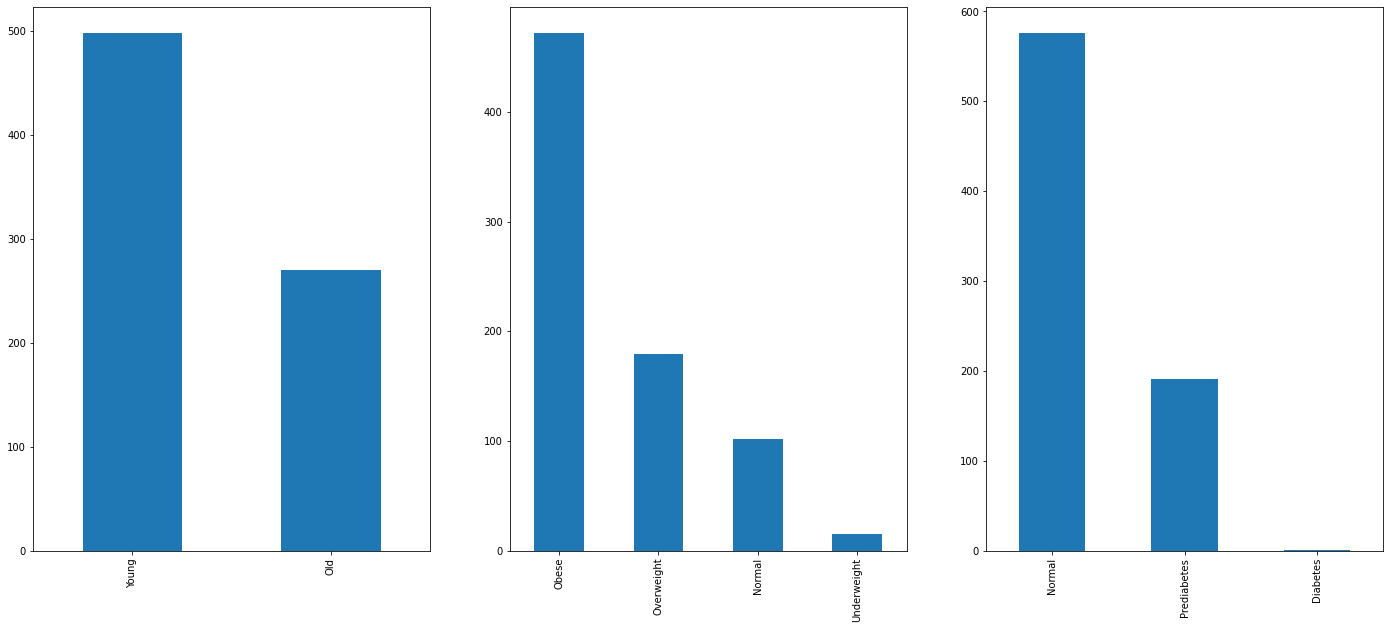

In [249]:
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
df_copy['Age Range'].value_counts().plot(kind='bar')


plt.subplot(1,3,2)
df_copy['BMI TYPE'].value_counts().plot(kind='bar')


plt.subplot(1,3,3)
df_copy['Glucose level'].value_counts().plot(kind='bar')





plt.gcf().set_size_inches(10, 10)
plt.subplots_adjust(right=2)


In [271]:

# Checking to see the percentage of young vs old women in the dataset

old_perctentage=df_copy[df_copy['Age Range']=='Old']
# print(old_perctentage.shape)
overall= df_copy['Age Range'].shape
# print(overall[0])
x1=old_perctentage.shape




young_perctentage=df_copy[df_copy['Age Range']=='Young']
x2=young_perctentage.shape

breakout1=x1[0]/overall[0]
breakout2=x2[0]/overall[0]







output=pd.DataFrame([breakout1,breakout2])
output


,0
0,0.351562
1,0.648438


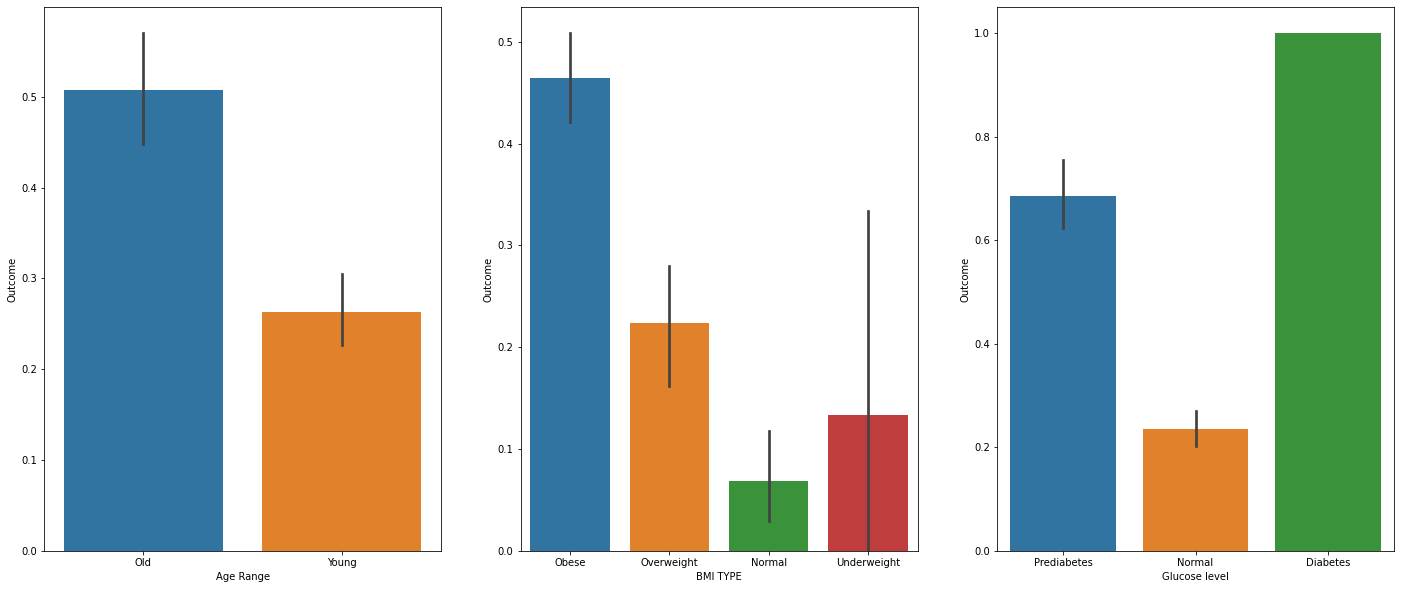

In [251]:
plt.subplot(1,3,1)
sns.barplot(x='Age Range',y='Outcome',data=df_copy)

plt.subplot(1,3,2)
sns.barplot(x='BMI TYPE',y='Outcome',data=df_copy)


plt.subplot(1,3,3)
sns.barplot(x='Glucose level',y='Outcome',data=df_copy)



plt.gcf().set_size_inches(10, 10)
plt.subplots_adjust(right=2)

**Graph1:** This is an interesting graph that visualize that depending on the age. Older women have more than twice chance of becoming diabetes. 

**Graph 2:** None of the women who are underweight have diabetes

**Graph 3:** No surprising information because high glucose level lead to diabetes. 


From these 3 graphs it could be seen than majority of the women are old,Obese, and therefore have high glucose level . This data clearly is not balanced since there are so much more Old pe



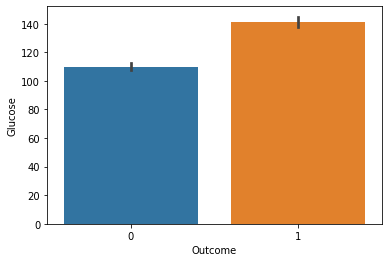

In [261]:
sns.barplot(x='Outcome',y='Glucose',data=dataframe)

In [270]:
# Checking to see how many women are young but have are diabetic
d=df_copy.where((df_copy['Glucose level']=='Diabetes') & (df_copy['Age Range']=='Young')).value_counts()


Pregnancies  Glucose  BloodPressure  Glucose level  SkinThickness  Insulin  BMI   BMI TYPE  DiabetesPedigreeFunction  Age   Age Range  Outcome
1.0          199.0    76.0           Diabetes       43.0           0.0      42.9  Obese     1.394                     22.0  Young      1.0        1
dtype: int64

It's very interesting that among people younger than 33 , there is only 1 woman aged 22 that is considerred as diabetic. Facts that put this woman in diabetic range is one pregnancy , and her BMI range. 